# Match 2D

In [1]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import Table, Column
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

In [94]:
print 'Reading files'
w = Table.read('wen.csv', format='csv') 
r = Table.read('redmapper.fits') 
k = Table.read('koester2007.vot', format='votable')

print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k)

Reading files
Wen: 132684
Rykoff: 26111
Koester: 13823


In [95]:
# RA e DEC catalogo Wen
#print w['RAJ2000'], w['DEJ2000']

# RA e DEC catalogo Redmapper
#print r['RA'], r['DEC']

# RA e DEC catalogo Koester
#print k['RAJ2000'], k['DEJ2000']

In [96]:
NSIDE = 32

In [115]:
# Phi e theta do Wen
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])

In [116]:
#Phi e theta do Rykoff
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [117]:
#Phi e theta do Koester
phi_k = np.deg2rad(k['RAJ2000'])
theta_k = np.deg2rad(90.-k['DEJ2000'])

In [118]:
# Pixels do Wen
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)
n = np.arange(hp.nside2npix(NSIDE))

In [119]:
# Pixels do Rykoff
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)
m = np.arange(hp.nside2npix(NSIDE))

In [120]:
#Pixels do Koester
kpix = hp.ang2pix(NSIDE,theta_k, phi_k)
l = np.arange(hp.nside2npix(NSIDE))

In [121]:
print(hp.get_map_size(m))
print(hp.get_map_size(n))
print(hp.get_map_size(l))

12288
12288
12288


In [122]:
print len(wpix)
print len(rpix)
print len(kpix)

132684
26111
13823


In [123]:
#Retira os numeros de pixels repetidos
uwpix = np.unique(wpix)
urpix = np.unique(rpix)
ukpix = np.unique(kpix)
print len(uwpix)
print len(urpix)
print len(ukpix)

4900
3288
2379


In [124]:
allpix = wpix.data.tolist()
allpix.extend(rpix.data.tolist())
allpix.extend(kpix.data.tolist())
print len(allpix)
allpix = np.unique(np.array(allpix))
print len(allpix)


172618
4900


In [125]:
# Match de wpix com rpix
lista = []
#rp = range(0,len(rpix))
#wp = range(0,len(wpix))
for wp in uwpix: 
    for rp in urpix:
        if wp==rp:
            lista.append(wp)

In [126]:
print len(lista)

3288


In [127]:
#Match da lista com o kpix
lista_m = []
#kp = range(0,len(kpix))
#lp = range(0,len(lista))
for kp in ukpix:
    for lp in lista:
        if lp==kp:
            lista_m.append(kp)

In [128]:
print len(lista_m)

2311


In [133]:
goodw, goodr, goodk = [], [], []
 
for goodpix in lista_m:
    goodw.extend(w[wpix==goodpix])
    goodr.extend(r[rpix==goodpix])
    goodk.extend(k[kpix==goodpix])
            

In [135]:
print len(goodw), len(w)
print len(goodr), len(r)
print len(goodk), len(k)

80917 132684
18758 26111
13611 13823


In [20]:
#sysmap = np.zeros(hp.nside2npix(NSIDE),dtype=np.float32) +hp.UNSEEN
wmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
rmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
kmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
mmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN

In [21]:
wmap[wpix] = 1
rmap[rpix] = 1
kmap[kpix] = 1 
mmap[lista_m] = 1

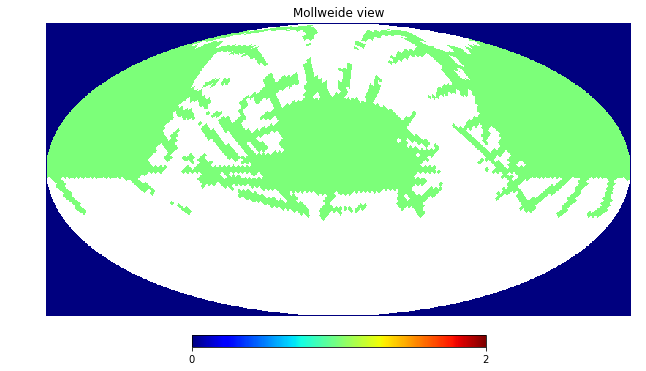

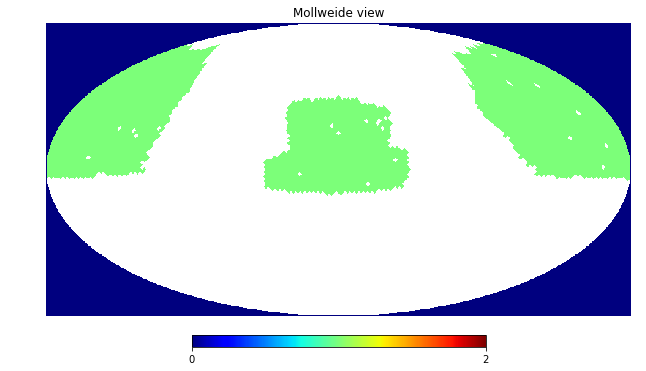

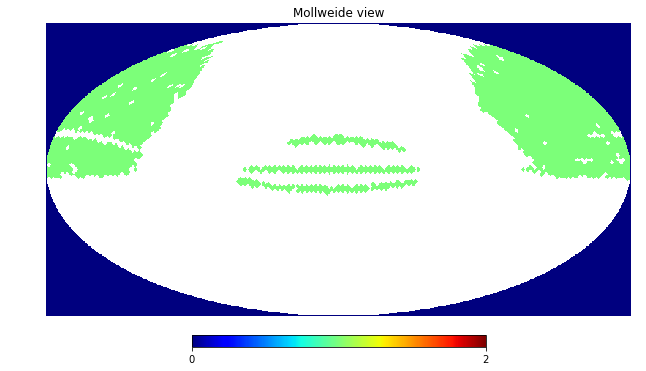

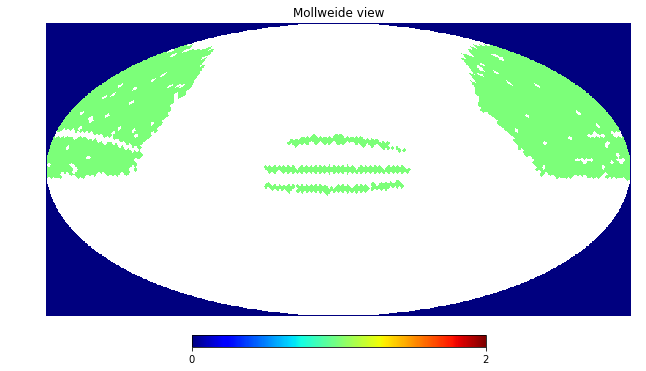

In [22]:
hp.mollview(wmap, fig=1, cmap='jet')
hp.mollview(rmap, fig=2, cmap='jet')
hp.mollview(kmap, fig=3, cmap='jet')
hp.mollview(mmap, fig=4, cmap='jet')

In [27]:
print 'Area of final fooprint %d'%(len(lista_m)*hp.nside2pixarea(32, degrees=True))

Area of final fooprint 7758


Diagrama de Venn


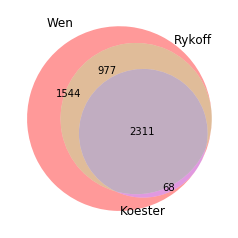

In [28]:
print("\033[43;30mDiagrama de Venn\033[m")
Wen = set(wpix)
Rykoff = set(rpix)
Koester = set(kpix)
venn3([Wen, Rykoff, Koester], ('Wen', 'Rykoff', 'Koester'))
plt.show()

In [29]:
print("\033[43;30mResultados\033[m")
W_R = Wen.intersection(Rykoff)
print len(W_R)

W_K = Wen.intersection(Koester)
print len(W_K)

K_R = Koester.intersection(Rykoff)
print len(K_R)

W_R_K = Wen.intersection(Koester).intersection(Rykoff)
print len(W_R_K)

Resultados
3288
2379
2311
2311


# MATCH 3D

Fazer histograma z dos catalogos.
Fazer o match de um catalogo com o outro. Usando o astropy.

In [34]:
NSIDE = 1024
hp.nside2pixarea(NSIDE, degrees=True)

0.0032784908016061202

In [141]:
# z do Wen, Rykoff e Koester
raw = goodw['raj2000']
decw = goodw['dej2000']

rar = goodr['ra']
decr = goodr['dec']

rak = goodk['raj2000']
deck = goodk['dej2000']

z_w = goodw['zph']

z_r = goodr['z_lambda']

z_k = goodk['zph']

TypeError: list indices must be integers, not str

In [37]:
# Formatando o Wen para o Diagrama de Venn
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)
n = np.arange(hp.nside2npix(NSIDE))

print("\033[43;30mWen - wpix e z\033[m")
lista_wen = []
for i in xrange(0,len(wpix)):
    lista_wen.append('%d_%.1f'%(wpix[i], z_w[i]))
print len(lista_wen)

Wen - wpix e z
132684


In [38]:
# Formatando o Rykoff para o Diagrama de Venn
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)
n = np.arange(hp.nside2npix(NSIDE))

print("\033[43;30mRykoff - rpix e z\033[m")
lista_rykoff = []
for i in xrange(0,len(rpix)):
    lista_rykoff.append('%d_%.1f'%(rpix[i], z_r[i]))
print len(lista_rykoff)

Rykoff - rpix e z
26111


In [39]:
# Formatando o Koester para o Diagrama de Venn
kpix = hp.ang2pix(NSIDE, theta_k, phi_k)
n = np.arange(hp.nside2npix(NSIDE))

print("\033[43;30mKoester - kpix e z\033[m")
lista_koester = []
for i in xrange(0,len(kpix)):
    lista_koester.append('%d_%.1f'%(kpix[i], z_k[i]))
print len(lista_koester)

Koester - kpix e z
13823


Diagrama de Venn


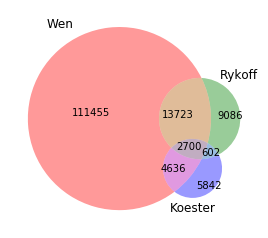

In [144]:
print("\033[43;30mDiagrama de Venn\033[m")
Wen = set(lista_wen)
Rykoff = set(lista_rykoff)
Koester = set(lista_koester)
venn3([Wen, Rykoff, Koester], ('Wen', 'Rykoff', 'Koester'))
#plt.show()
plt.savefig('venn_nofootprint.png', dpi=300)